**Practice Project Submitted By Bisola Beauty Ayankoya**

## Description of Project 

The World Happiness Report stands as a pivotal examination of global happiness levels. Its inaugural publication dates back to 2012, followed by subsequent reports in 2013, 2015, and the 2016 Update. Released annually, the World Happiness Report 2017, which assesses the happiness levels of 155 countries, was unveiled at the United Nations during festivities marking the International Day of Happiness on March 20th. Over time, this report has garnered widespread acclaim, with governments, organizations, and civil society increasingly relying on happiness metrics to shape their policymaking endeavors. Esteemed experts spanning diverse disciplines such as economics, psychology, survey analysis, national statistics, health, and public policy, elaborate on how well-being measurements can effectively gauge a nation's progress. These reports delve into the contemporary state of global happiness while elucidating how the emerging science of happiness elucidates both individual and national happiness disparities.

**Problem Statement**:To forecast the happiness score while taking into account all the other variables present in the dataset.

In [1]:
#Import all neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import plotly.graph_objects as go
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importing Dataset
df_worldhappiness = pd.read_csv('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/World%20Happiness/happiness_score_dataset.csv')
df_worldhappiness

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


The dataset collection consists of 158 rows and 12 columns.

In [3]:
# Lets rename some of the columns
df_worldhappiness = df_worldhappiness.rename(columns={'Economy (GDP per Capita)':'GDP per Capita'})
df_worldhappiness = df_worldhappiness.rename(columns={'Health (Life Expectancy)':'Life Expectancy'})
df_worldhappiness = df_worldhappiness.rename(columns={'Trust (Government Corruption)':'Corruption'})

In [4]:
df_worldhappiness.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [5]:
df_worldhappiness.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


**EXPLORATORY ANALYSIS**

In [6]:
# Dataset dimension
df_worldhappiness.shape

(158, 12)

The dataset has 158 rows and 12 columns.i.e. 1 is **target variable** while the other 11 are **independent variables**.

In [7]:
# Checking dataset details and datatype.
df_worldhappiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness Rank     158 non-null    int64  
 3   Happiness Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   GDP per Capita     158 non-null    float64
 6   Family             158 non-null    float64
 7   Life Expectancy    158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Corruption         158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


The dataset contains three(3) types of data: object,int64 and float64.Country and Region are both objects,Happiness Rank is integer while Happiness Score and the remaining variables are a float.

In [8]:
#Column checks
df_worldhappiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'GDP per Capita', 'Family', 'Life Expectancy',
       'Freedom', 'Corruption', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [9]:
df_worldhappiness.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'GDP per Capita',
 'Family',
 'Life Expectancy',
 'Freedom',
 'Corruption',
 'Generosity',
 'Dystopia Residual']

In [10]:
#check for null values
df_worldhappiness.isnull().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
GDP per Capita       0
Family               0
Life Expectancy      0
Freedom              0
Corruption           0
Generosity           0
Dystopia Residual    0
dtype: int64

The output above indicates the presence of non-null values within the dataset, which enhances its quality.

In [11]:
# Checking each column for no of unique values 
df_worldhappiness.nunique().to_frame("No.of unique values")

,No.of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
GDP per Capita,158
Family,158
Life Expectancy,157
Freedom,158
Corruption,157


In [12]:
df_worldhappiness.describe()

,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**This offers statistical information regarding the numerical columns. The summary of the dataset seems adequate, with no instances of negative or invalid values detected.**

From the above Information, we can observe as follows-:

1. The counts of all the columns are the same i.e.158 which means there are no missing values in the dataset.
2. The dataset shows the mean, Standard deviation(**std**), minimum(**min**), lower(**25%**),median(**50%**) and the upper quartile(**75%**),then the maximum value of each column.
3.By summarizing the data we can observe that there are not much significant differences between 75%(Q3) and max except that of Happiness Rank.
4. We can also notice the Standard deviation,min,25%(Q1) percentile from this **describe** method.

In [13]:
# Lets check for Skewness again
df_worldhappiness.skew()

Happiness Rank       0.000418
Happiness Score      0.097769
Standard Error       1.983439
GDP per Capita      -0.317575
Family              -1.006893
Life Expectancy     -0.705328
Freedom             -0.413462
Corruption           1.385463
Generosity           1.001961
Dystopia Residual   -0.238911
dtype: float64

**Observation**: Variables such as Happiness Rank,Happiness Score,Standard Error,Corruption and Generosity are positively-skewed  indicating a longer right tail while GDP per Capita,Family,Life Expectancy,Freedom and Dystopia Residual are negatively-skewed indicating a longer left tail.A skewness value closer to 0 suggests a more symmetrical distribution.

In [14]:
df_worldhappiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:>

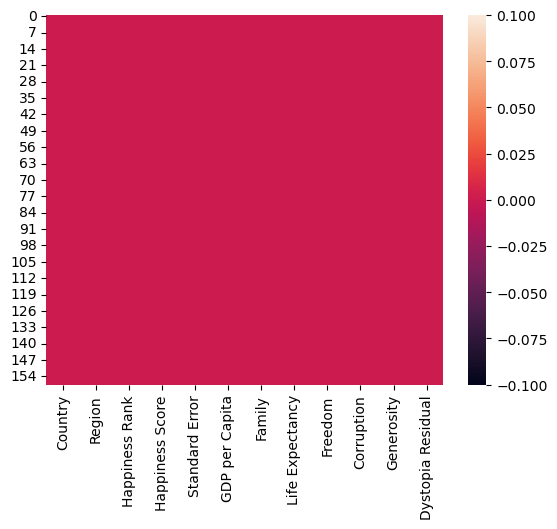

In [15]:
#Visualize using heatmap
sns.heatmap(df_worldhappiness.isnull())

**Correlation between Target variable and Independent Variables**.

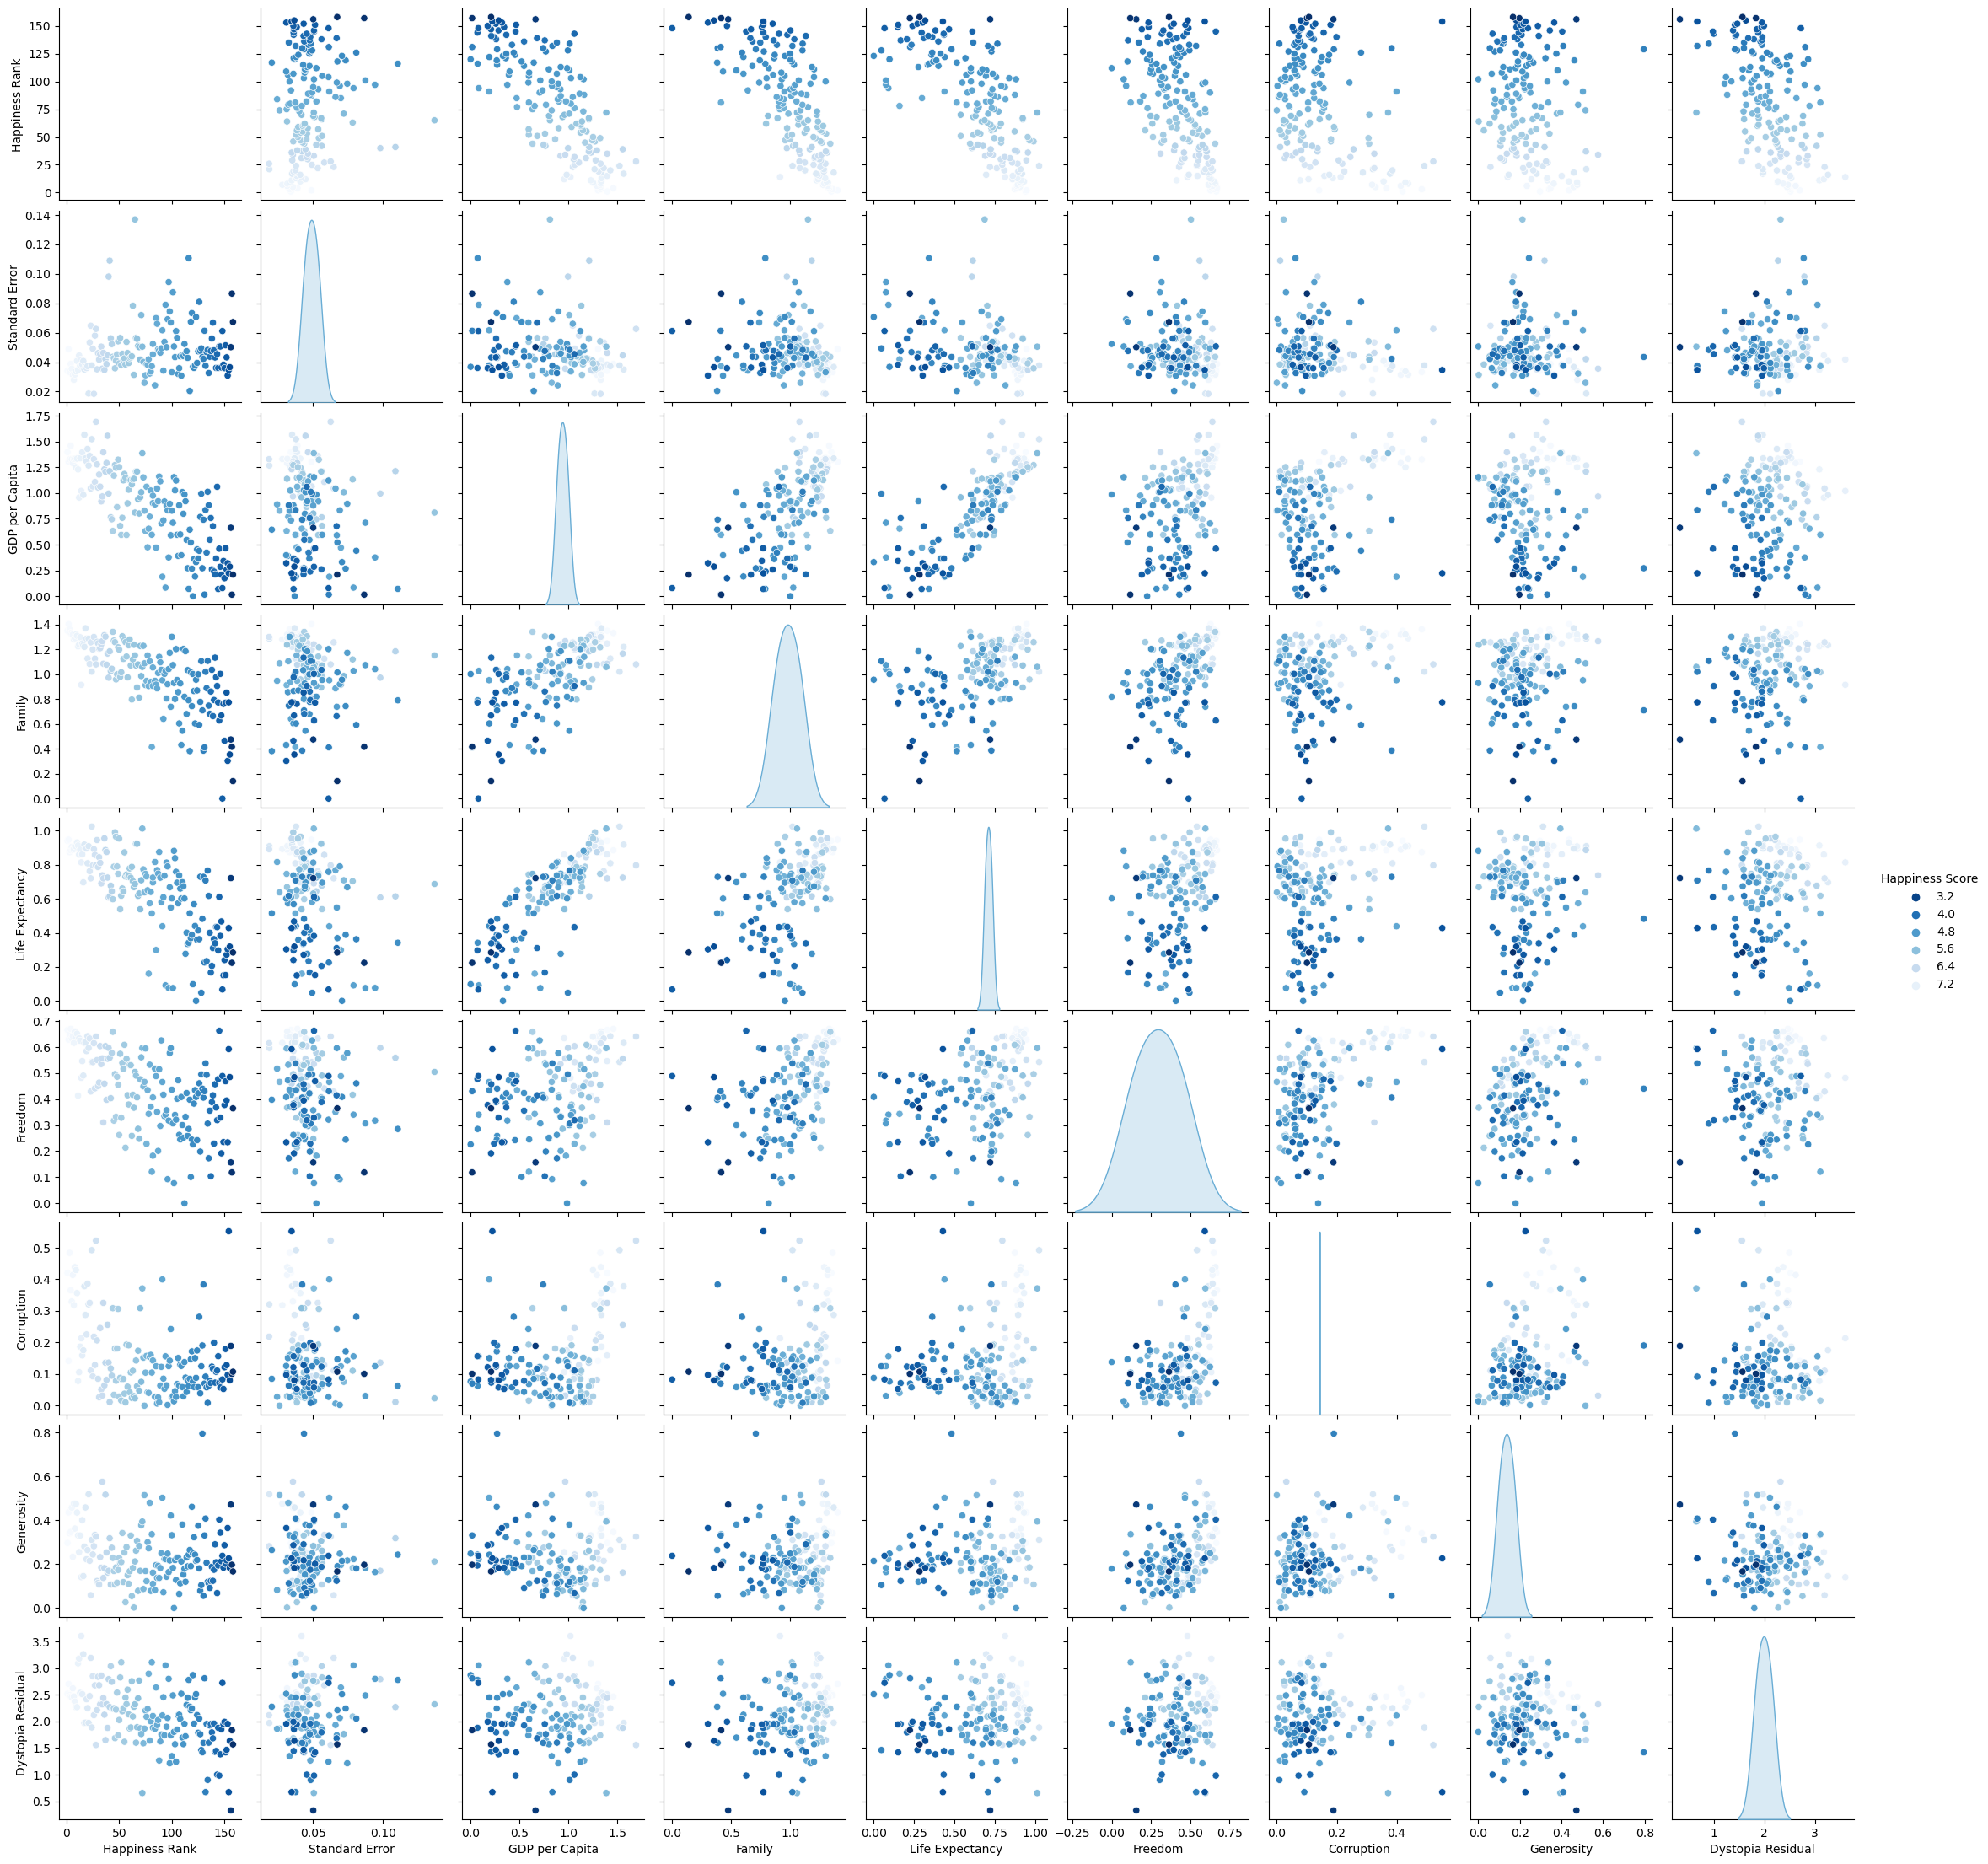

In [16]:
sns.pairplot(df_worldhappiness, hue = "Happiness Score", palette = "Blues_r")
plt.show()

<AxesSubplot:>

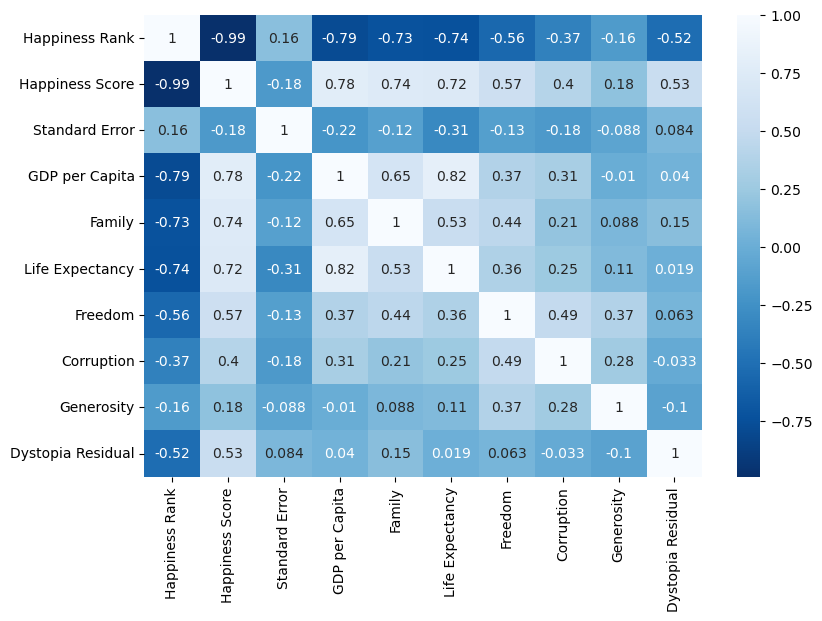

In [17]:
# visualize variables for probable correlation
corr = df_worldhappiness.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True,cmap="Blues_r")

Observations: 

1. It is evident that there exists a correlation between the Happiness Rank and Score, wherein they are inversely proportional; meaning, as the Happiness Rank increases, the Happiness Score decreases. 
2. This pattern is observed with other variables as well. Thus, 
3. It is Ideal to exclude the Happiness Rank variable and reevaluate the correlations to determine their true effectiveness.

In [18]:
# Let's now Remove Happiness Rank
df1 = df_worldhappiness.drop(['Happiness Rank'], axis=1)

<AxesSubplot:>

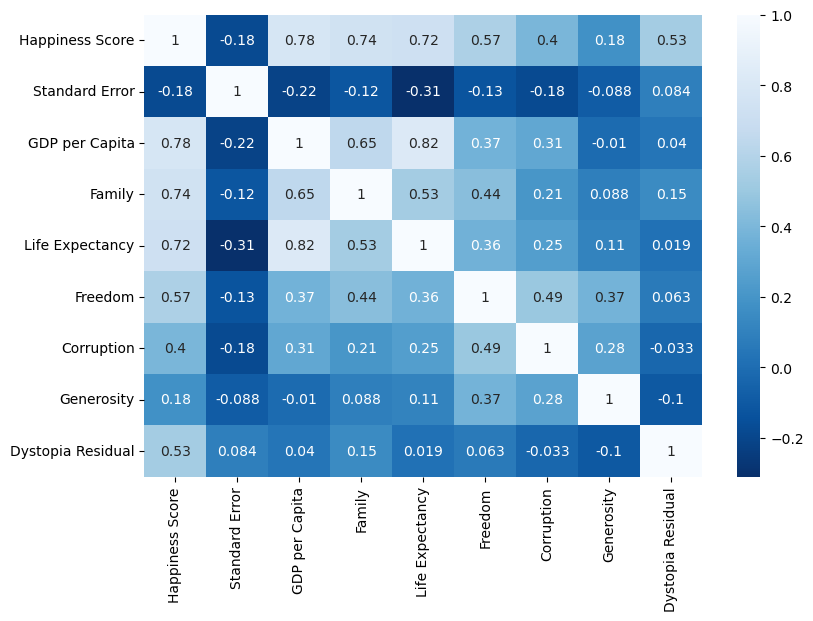

In [19]:
# Check the heatmap again
corr = df1.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr,annot=True,cmap="Blues_r")

Now that we have removed the Happiness Rank.The Economy,Family,Health,Freedom and dystopia Residual are highly correlated with Happiness Score while Corruption and Generosity are the least correlated.

In [20]:
# Checking correlation between features & target variables.
cor = df1.corr()
cor

,Happiness Score,Standard Error,GDP per Capita,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
GDP per Capita,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Life Expectancy,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Corruption,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


*  **0-** no relation,**-0.3 to +0.3** - less correlation,**greater than -0.5 or greater than +0.5**- moderate correlation, greater than -0.7

Analyzing the correlation between the dependent and independent variables allows us to ascertain their relationship. One method of visually illustrating this connection is by generating a heatmap plot, as depicted above.

**With the use of a bar plot, we now Visualize the correlation between label & the features**

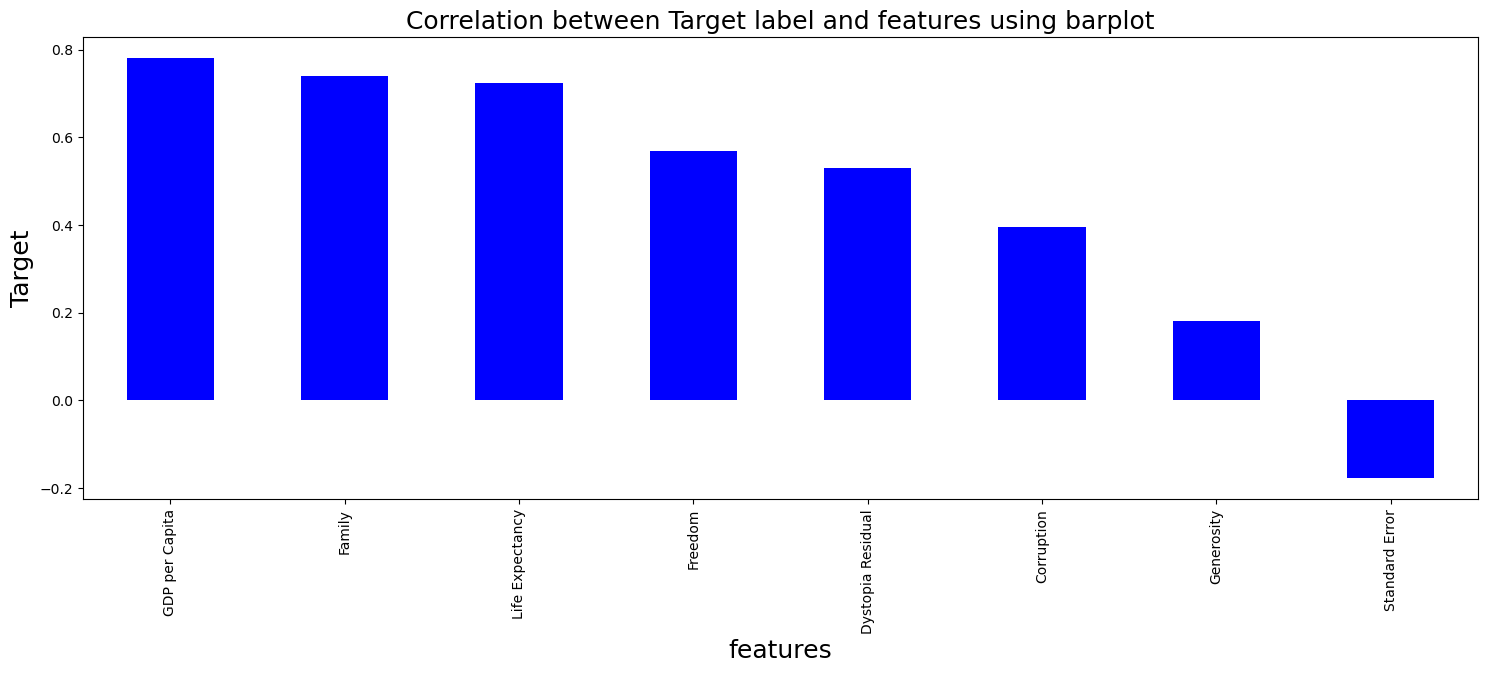

In [21]:
plt.figure(figsize = (18, 6))
df1.corr()['Happiness Score'].sort_values(ascending = False).drop(['Happiness Score']).plot(kind='bar',color="b")
plt.xlabel('features', fontsize = 18)
plt.ylabel('Target', fontsize = 18)
plt.title("Correlation between Target label and features using barplot", fontsize=18)
plt.show()

According to the bar plot shown above, it's clear that there are both positive and negative correlations between the features and the target variable. In particular, the feature **"Generosity"** demonstrates a minimal correlation with the target column.

## Separating Features and Label

In [22]:
# Splitting the independent and target variables into x and y

x = df_worldhappiness[['GDP per Capita', 'Family', 'Life Expectancy', 'Freedom', 'Dystopia Residual', 'Corruption', 'Generosity']]
y = df_worldhappiness['Happiness Score']

print("Feature Dimension=",x.shape)
print("label Dimension=",y.shape) 

Feature Dimension= (158, 7)
label Dimension= (158,)


In [23]:
x

,GDP per Capita,Family,Life Expectancy,Freedom,Dystopia Residual,Corruption,Generosity
0,1.39651,1.34951,0.94143,0.66557,2.51738,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,2.70201,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,2.49204,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,2.46531,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,2.45176,0.32957,0.45811
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.67042,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,1.63328,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.32858,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,1.83302,0.10062,0.19727


In [24]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

**Creating train test split**

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## ML Modelling and Predictions

## Linear Regression Model

**Building and Training the LR Model**

In [26]:
# Setting up the LR model
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [27]:
LR.score(x_test, y_test)

0.9999999484481188

**Cross-validation using RMSE and MAE** 

This involves evaluating the model's generalization performance. By employing Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), we gauge how effectively the model is expected to perform on new, unseen data. Smaller values of these metrics signify higher model accuracy, thus providing valuable insights into its overall performance.

In [28]:
scores = cross_val_score(LR, x, y, cv=7, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # We Convert -ve MSE to RMSE
mae_scores = -cross_val_score(LR, x, y, cv=7, scoring='neg_mean_absolute_error')
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)

Mean RMSE: 0.0002892534606339647
Mean MAE: 0.00025213800652306725


The linear regression model appears to be performing exceptionally well, with a very high coefficient of determination (nearly 100%) and very low error metrics (RMSE and MAE), indicating accurate predictions.

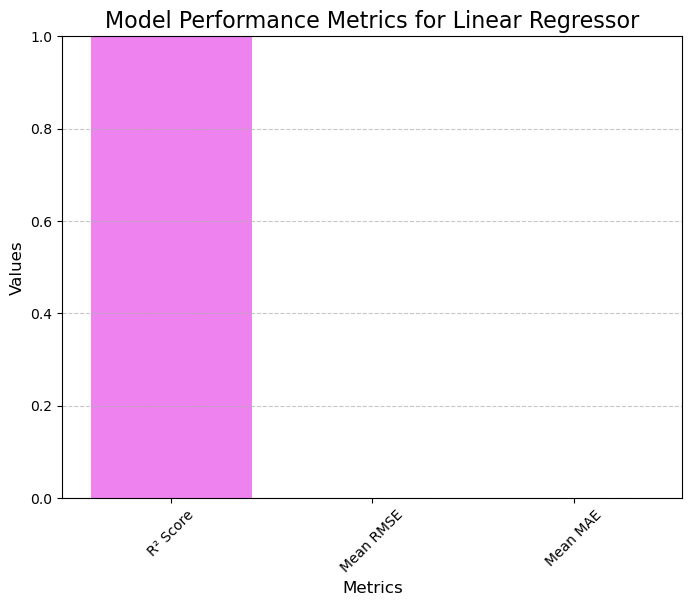

In [29]:
# Define the metrics and their values
metrics = ['R² Score', 'Mean RMSE', 'Mean MAE']
values = [0.9999999484481188, 0.0002892534606339647,0.00025213800652306725 ]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['violet', 'green', 'red'])
plt.title('Model Performance Metrics for Linear Regressor', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()

## Random Forest Regressor Model

**Building and Training the RF Model**

In [30]:
# Setting up the RF model
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
RF.score(x_test, y_test)

0.9448557219576809

In [32]:
scores = cross_val_score(RF, x, y, cv=7, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # We Convert -ve MSE to RMSE
mae_scores = -cross_val_score(RF, x, y, cv=7, scoring='neg_mean_absolute_error')
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)

Mean RMSE: 0.44212291990248775
Mean MAE: 0.3931589412761155


The RandomForestRegressor model perform exceptionally well, with high R-squared, low RMSE, and very low MAE values.Hence,the model captures the underlying patterns in the data effectively and makes accurate predictions.

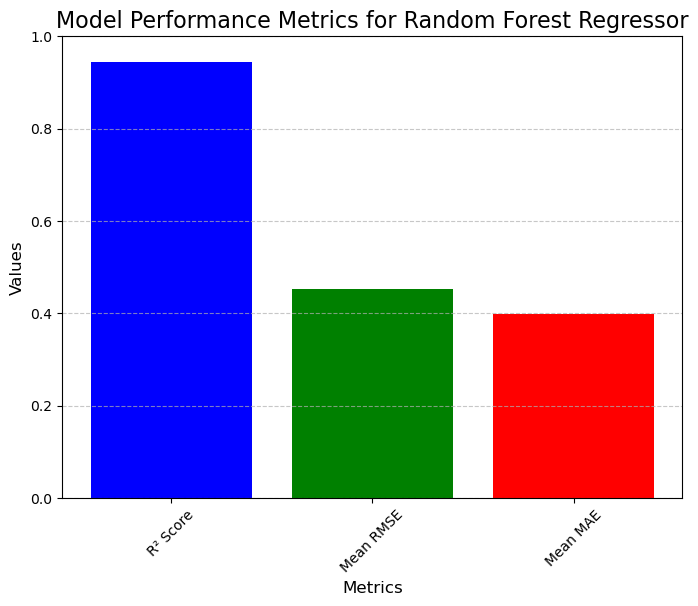

In [33]:
# Visualizing The Performance metrics for RandomForestRegressor Model
metrics = ["R² Score", "Mean RMSE", "Mean MAE"]
values = [0.9434832122983431, 0.45328985052312115, 0.3986121654432528]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.title('Model Performance Metrics for Random Forest Regressor', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()

## Decision Tree Regressor Model

**Building and Training the DT Model**

In [34]:
# Setting up the DT model
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)

DecisionTreeRegressor()

In [35]:
DTR.score(x_test, y_test)

0.8276454118995058

In [36]:
scores = cross_val_score(DTR, x, y, cv=7, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # We Convert -ve MSE to RMSE
mae_scores = -cross_val_score(DTR, x, y, cv=7, scoring='neg_mean_absolute_error')
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)

Mean RMSE: 0.6421118177463946
Mean MAE: 0.5544195369847544


The DecisionTreeRegressor model seems to perform reasonably by capturing a significant portion of the target variable's variance with relatively low errors in prediction.

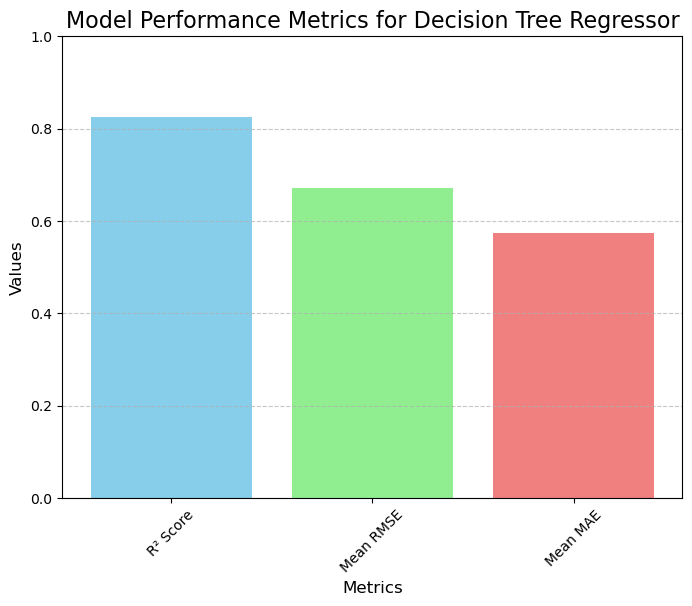

In [37]:
# Visualizing The Performance metrics for Decision Tree Regressor Model
metrics = ["R² Score", "Mean RMSE", "Mean MAE"]
values = [0.8259794435243133, 0.6714406579161688, 0.5738594014680972]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Performance Metrics for Decision Tree Regressor', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()

## KNeighborsRegressor Model

**Building and Training the KNN Model**

In [38]:
# Setting up the KNN model
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [39]:
KNN.score(x_test, y_test)

0.9593194676951581

In [40]:
scores = cross_val_score(KNN, x, y, cv=7, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # We Convert -ve MSE to RMSE
mae_scores = -cross_val_score(KNN, x, y, cv=7, scoring='neg_mean_absolute_error')
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)

Mean RMSE: 0.4371736102343205
Mean MAE: 0.38281338226990397


The K-Nearest Neighbors(KNN) model achieved a score of 0.96, indicating high accuracy. Mean RMSE stands at 0.44, representing average prediction errors of about 0.44 units. Mean MAE is 0.38, showing average absolute prediction errors around 0.38 units.Hence, the model demonstrates strong predictive performance across the evaluation metrics.

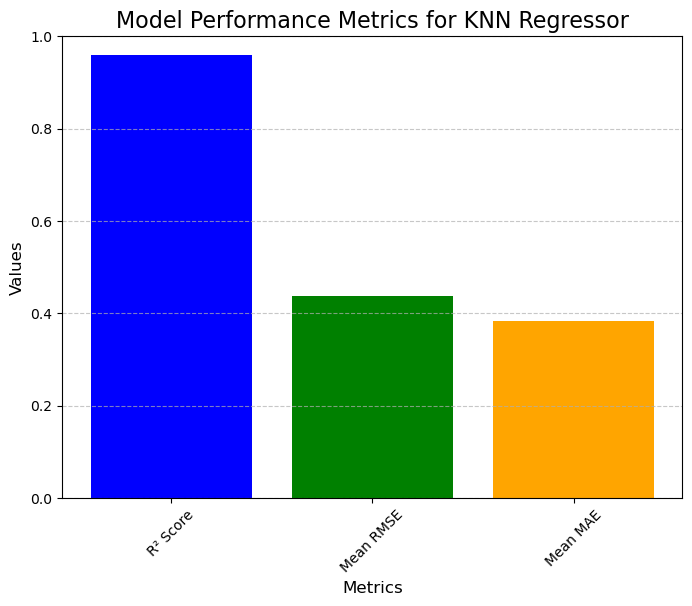

In [41]:
# Visualizing The Performance metrics for KNN Model
metrics = ["R² Score", "Mean RMSE", "Mean MAE"]
values = [0.9593194676951581, 0.4371736102343205, 0.38281338226990397 ]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Model Performance Metrics for KNN Regressor', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()

## GradientBoosting Regressor Model

**Building and Training the GradientBoosting Regressor Model**

In [42]:
# Setting up the GradientBoosting Regressor model
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)

GradientBoostingRegressor()

In [43]:
GBR.score(x_test, y_test)

0.96541315621557

In [44]:
scores = cross_val_score(GBR, x, y, cv=7, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # We Convert -ve MSE to RMSE
mae_scores = -cross_val_score(GBR, x, y, cv=7, scoring='neg_mean_absolute_error')
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)

Mean RMSE: 0.3950430101504259
Mean MAE: 0.3370352813670762


The Gradient Boosting Regressor achieved a high score of 0.96, indicating strong predictive performance. Mean RMSE was 0.39, suggesting average prediction deviation of 0.39 units, while Mean MAE was 0.343, implying an average prediction error of 0.34 units. Hence, the model demonstrates precise and effective prediction capabilities.

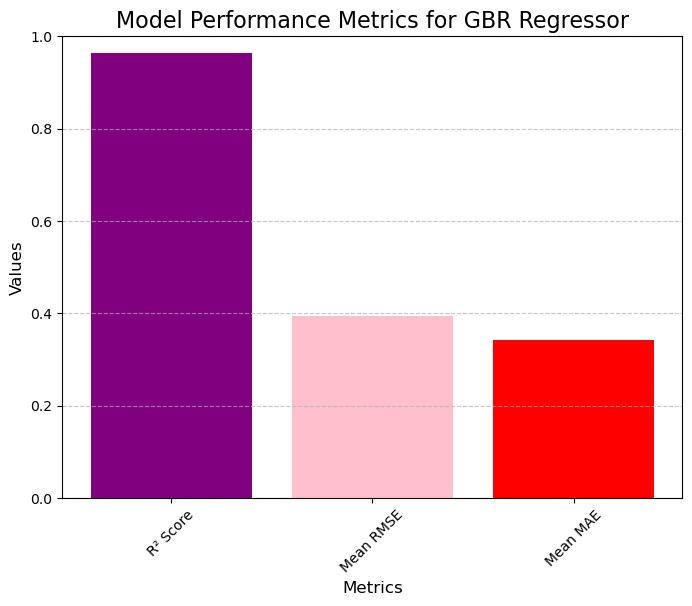

In [45]:
# Visualizing The Performance metrics for Gradient Boosting Regressor Model
metrics = ["R² Score", "Mean RMSE", "Mean MAE"]
values = [0.964672330542352, 0.3934433515406757, 0.3414843535701414]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['purple', 'pink', 'red'])
plt.title('Model Performance Metrics for GBR Regressor', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.show()

## Summary

The World Happiness prediction project used various regression models to predict the happiness scores. Notably, Linear Regression exhibited exceptional performance with an almost perfect R-squared value of 0.99, indicating an excellent fit to the data. Other models such as Random Forest, KNN, and GradientBoosting also performed well, achieving high R-squared values ranging from 0.94 to 0.96. However, the Decision Tree model lagged behind with an R-squared value of 0.82, suggesting limitations in capturing data complexities. Despite differences, all models demonstrated low error metrics, implying accuraty in the predictions.The project successfully utilized regression techniques to predict World Happiness levels.

In [46]:
import joblib
#joblib.dump(LR, "World Happiness.pkl")

In [47]:
import pickle
filename='World Happiness.pkl'
pickle.dump(LR, open(filename, 'wb')) #saved model

In [48]:
loaded_model =pickle.load(open('World Happiness.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

99.99999484481188


In [49]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Predicted,4.306899,5.987106,4.19426,2.904531,5.057215,6.574078,4.897534,4.876007,4.948698,3.930786,...,7.199843,7.284016,6.485146,5.192315,5.888986,3.955619,4.369173,3.680841,3.78077,5.332488
Original,4.307000,5.987000,4.19400,2.905000,5.057000,6.574000,4.898000,4.876000,4.949000,3.931000,...,7.200000,7.284000,6.485000,5.192000,5.889000,3.956000,4.369000,3.681000,3.78100,5.332000


The prediction accuracy is high, as demonstrated by the close alignment between predicted and original values.e.g.the predicted value of 4.306899 closely matches the original value of 4.307000. This consistency is observed across all instances, indicating the model's strong performance and its ability to generalize effectively to new data.

**The End**